# DNN
## import pytorch-library

In [41]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

## Reading Dataset
In machine learning, 'X' is **Feature Matrix**, it includes the Feature Values of all samples.
So the shape of 'X' commonly is a two dimension matrix, (n_samples, n_features), which means the numbers of sample and feature. 
Even if the input only has one feature, 'X' still should be a 2D matrix since of the exception of machine learning.

In [42]:
data = pd.read_csv("data", header=None, sep='\t', names=['参数', '结果'])
X = data[['参数']].values
y = data['结果'].values

## Splitting Dataset
Dataset will be split into two part for training and validating.

In [43]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=40,
    random_state=42 # Fix the random seed to make sure each test has same sample
)

## Standardise Dataset
Use 'StandardScaler' to standardise features of input and output. (mean value = 0, variance = 1)
- $z = (x-u)/s$, $x$ is sample, $u$ is mean of $x$, $s$ is standard deviation

Because the distribution of `y_val` is so shape, a log transform is adopted to smooth it `y_val_log`.

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

y_train_log = np.log10(y_train.reshape(-1,1))
y_val_log = np.log10(y_val.reshape(-1,1))
y_train_scaled = scaler.fit_transform(y_train_log)
y_val_scaled = scaler.transform(y_val_log)

## Visual the distribution of dataset

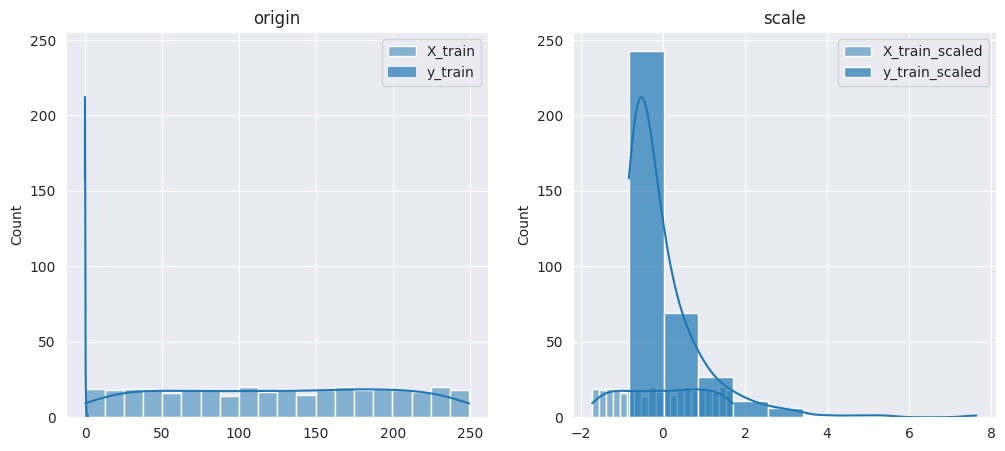

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(X_train, bins=20, kde=True, ax=axes[0], color="blue", label="X_train")
sns.histplot(y_train_log, bins=10, kde=True, ax=axes[0], color="red", label="y_train", alpha=0.7)
axes[0].set_title("origin")
axes[0].legend()

sns.histplot(X_train_scaled, bins=20, kde=True, ax=axes[1], color="blue", label="X_train_scaled")
sns.histplot(y_train_scaled, bins=10, kde=True, ax=axes[1], color="red", label="y_train_scaled", alpha=0.7)
axes[1].set_title("scale")
axes[1].legend()

plt.show()

## Transform to Tensor
Pytorch is a based on Tensor deeplearning framework, all model and operation need to use torch.Tensor.
- The array and matrix is transformed to tensor for GPU acceleration.

In [47]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)

## Dataset Loader
 